<a href="https://colab.research.google.com/github/CianOSull/AutoML_With_SA_FYP_2021/blob/Pycaret/Copy_of_Pycaret_MainNotebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Generic Notebook for running all the libraries

How this notebook works is that it contains the code
for loading and cleaning the dataset.

Then there is multiple branches created on the
Github that include the code for running each library.

E.g. MLBox branch has the code for running MLBox.

# CURRENT BRANCH: PYCARET

# Install the necessary library
Run the install code in the code cell below.

# Second install

Youtube tutorial:

https://www.youtube.com/watch?v=4Rn4YMLUjGc

In [ ]:
!pip install pycaret

# Previous install doesnt have xgboost

In [ ]:
!pip install pycaret[full]

     |████████████████████████████████| 266kB 4.3MB/s 
     |████████████████████████████████| 14.2MB 283kB/s 
     |████████████████████████████████| 215kB 41.9MB/s 
     |████████████████████████████████| 276kB 53.7MB/s 
     |████████████████████████████████| 102kB 9.9MB/s 
     |████████████████████████████████| 61kB 6.7MB/s 
     |████████████████████████████████| 1.7MB 53.2MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 6.8MB 50.4MB/s 
     |████████████████████████████████| 2.0MB 43.3MB/s 
     |████████████████████████████████| 81kB 9.5MB/s 
     |████████████████████████████████| 245kB 53.9MB/s 
     |████████████████████████████████| 67.3MB 62kB/s 
     |████████████████████████████████| 47.5MB 101kB/s 
     |████████████████████████████████| 3.6MB 24.3MB/s 
     |████████████████████████████████| 348kB 56.9MB/s

# Preprocessing Section

In [ ]:
# Import the necessary modules for cleaning
import math
import time 
import pandas as pd
import numpy as np
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize 
from sklearn.utils import shuffle
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

In [ ]:
# Download the necessary parts for the NLTK module
import nltk
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

# Pycaret Code

# Information on runnning classifcation mode

https://pycaret.org/classification/

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# A dense numpy array of the sparse matrix outputted can be made by using:
# X_train.toarray()
def create_data(num, process):  
  imdb_df = pd.read_csv("/content/drive/MyDrive/CIT/FYP/ImplementationFiles/IMDB_Dataset.csv")

  # the next step is to randomize the rows of the data
  imdb_df = imdb_df.sample(frac=1).reset_index(drop=True)

  imdb_df['sentiment'] = imdb_df['sentiment'].map({'negative' : 0, 'positive' : 1})

  features = imdb_df.review.values[0:num]
  labels = imdb_df.sentiment.values[0:num]

  no_samples = 0.8

  # This gets the percentage of indexes from feature vector and uses those for training
  train_txt = features[0:int(no_samples*len(features))]
  y_train = labels[0:int(no_samples*len(labels))]

  # Go from the index that was used for training to the final
  test_txt = features[int(no_samples*len(features)):len(features)]
  y_test = labels[int(no_samples*len(labels)):len(labels)]

  # This cell has the sk learn functions
  # Allows you to choose which function you want to use
  if process == 0:
    ctv = CountVectorizer(tokenizer=word_tokenize, token_pattern=None)

    ctv.fit(features)

    X_train_sparse = ctv.transform(train_txt)
    X_test_sparse = ctv.transform(test_txt)

  else:
    tfv = TfidfVectorizer(tokenizer=word_tokenize, token_pattern=None)

    tfv.fit(features)

    X_train_sparse = tfv.transform(train_txt)
    X_test_sparse = tfv.transform(test_txt)

  # Converting to numpy arrays for more generic format
  X_train = X_train_sparse.toarray()
  X_test = X_test_sparse.toarray()

  return X_train, y_train, X_test, y_test

# Data Results

# Pree Full install
2500 still gives 0.5

5000 fails

300 gives 0.5

# Post Full install

In [ ]:
# Importing data using pandas
import pandas as pd

# 2500 still gives 0.5
# 5000 fails
X_train, y_train, X_test, y_test = create_data(500, 1)

print(len(X_train))
print(len(y_train))
print(len(X_test))
print(len(y_test))

# Dual column dataframe way
# Convert feature_vectors into a pandas dataframe of 
# term frequency inverse document frequency of each word
tfidf_df_train = pd.DataFrame(columns = ['features', 'labels'])
tfidf_df_test = pd.DataFrame(columns = ['features', 'labels'])

for i in range(len(X_train)):
  tfidf_df_train.loc[i] = [X_train[i].tolist()] + [y_train[i]]

for i in range(len(X_test)):
  tfidf_df_test.loc[i] = [X_test[i].tolist()] + [y_test[i]]

# =================================================================
# Multiple column dataframe way
# tfidf_df_train = pd.DataFrame(X_train)
# tfidf_df_test =  pd.DataFrame(X_test)

# tfidf_df_train['labels'] = y_train
# tfidf_df_test['labels'] = y_test

print(tfidf_df_train.head())
print(tfidf_df_test.head())
#==========================================


400
400
100
100
                                            features labels
0  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...      1
1  [0.0, 0.0, 0.051051269542835606, 0.0, 0.0, 0.0...      0
2  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...      0
3  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...      0
4  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...      0
                                            features labels
0  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...      0
1  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...      1
2  [0.056860137170695595, 0.0, 0.0, 0.0, 0.0, 0.0...      0
3  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0380951154122...      1
4  [0.05231624701907185, 0.0, 0.0, 0.0, 0.0, 0.10...      0


# Model finding

In [ ]:
# Pycaret has few built in functions for machine learning like classifcation
# Importing module and initializing setup
from pycaret.classification import *

In [ ]:
# Pycaret always needs to run the setup first
# REMEMBER THAT NEEDS INPUT FROM KEYBOARD TO VERIFY CORRECT INFO
# numeric_features='features',
# When using multiple column dataframes,  issue of where it infers MANY columns
# categorical, and not numeric.
# While it is possible to had set them as numeric, I don't know about hard 
# setting multiple at once.
# Also this seems crash when using the multiple column method
clf1 = setup(data = tfidf_df_train, target = 'labels')

,Description,Value
0,session_id,5705
1,Target,labels
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(400, 2)"
5,Missing Values,False
6,Numeric Features,0
7,Categorical Features,1
8,Ordinal Features,False
9,High Cardinality Features,False


In [ ]:
models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


In [ ]:
best = compare_models(sort = 'AUC')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.5556,0.500,1.0,0.5556,0.7141,0.0,0.0,0.121
knn,K Neighbors Classifier,0.5413,0.500,0.9,0.4984,0.6414,0.0,0.0,0.189
dt,Decision Tree Classifier,0.5556,0.500,1.0,0.5556,0.7141,0.0,0.0,0.126
rf,Random Forest Classifier,0.5556,0.500,1.0,0.5556,0.7141,0.0,0.0,0.613
qda,Quadratic Discriminant Analysis,0.4444,0.500,0.0,0.0000,0.0000,0.0,0.0,0.129
ada,Ada Boost Classifier,0.5556,0.500,1.0,0.5556,0.7141,0.0,0.0,0.212
gbc,Gradient Boosting Classifier,0.5556,0.500,1.0,0.5556,0.7141,0.0,0.0,0.220
lda,Linear Discriminant Analysis,0.5556,0.500,1.0,0.5556,0.7141,0.0,0.0,0.131
et,Extra Trees Classifier,0.5556,0.500,1.0,0.5556,0.7141,0.0,0.0,0.622
xgboost,Extreme Gradient Boosting,0.5556,0.500,1.0,0.5556,0.7141,0.0,0.0,5.301


# XGB Model

In [ ]:
print("Creating Fit the model")
print("="*50)
start = time.time()
xgb = create_model('xgboost')
end = time.time()
print("="*50)
print("Model Fitting Finished")
print(f"Execution time is {end - start} secs")
print("="*50)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.5714,0.5,1.0,0.5714,0.7273,0.0,0.0
1,0.5714,0.5,1.0,0.5714,0.7273,0.0,0.0
2,0.5714,0.5,1.0,0.5714,0.7273,0.0,0.0
3,0.5714,0.5,1.0,0.5714,0.7273,0.0,0.0
4,0.5714,0.5,1.0,0.5714,0.7273,0.0,0.0
5,0.5357,0.5,1.0,0.5357,0.6977,0.0,0.0
6,0.5357,0.5,1.0,0.5357,0.6977,0.0,0.0
7,0.5357,0.5,1.0,0.5357,0.6977,0.0,0.0
8,0.5357,0.5,1.0,0.5357,0.6977,0.0,0.0
9,0.5556,0.5,1.0,0.5556,0.7143,0.0,0.0


Model Fitting Finished
Execution time is 64.23766541481018 secs


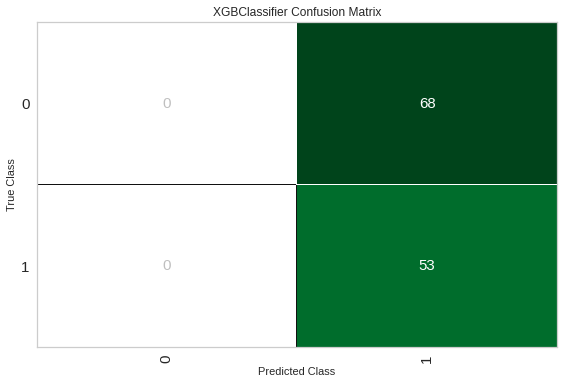

In [ ]:
plot_model(estimator = xgb, plot = 'confusion_matrix')

In [ ]:
print("Creating Fit the model")
print("="*50)
start = time.time()
tuned_xgb = tune_model(xgb)
end = time.time()
print("="*50)
print("Model Fitting Finished")
print(f"Execution time is {end - start} secs")
print("="*50)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.5357,0.5,0.0,0.0,0.0,0.0,0.0
1,0.5357,0.5,0.0,0.0,0.0,0.0,0.0
2,0.5357,0.5,0.0,0.0,0.0,0.0,0.0
3,0.5357,0.5,0.0,0.0,0.0,0.0,0.0
4,0.5357,0.5,0.0,0.0,0.0,0.0,0.0
5,0.5357,0.5,0.0,0.0,0.0,0.0,0.0
6,0.5357,0.5,0.0,0.0,0.0,0.0,0.0
7,0.5357,0.5,0.0,0.0,0.0,0.0,0.0
8,0.5357,0.5,0.0,0.0,0.0,0.0,0.0
9,0.5185,0.5,0.0,0.0,0.0,0.0,0.0


Model Fitting Finished
Execution time is 858.5018546581268 secs


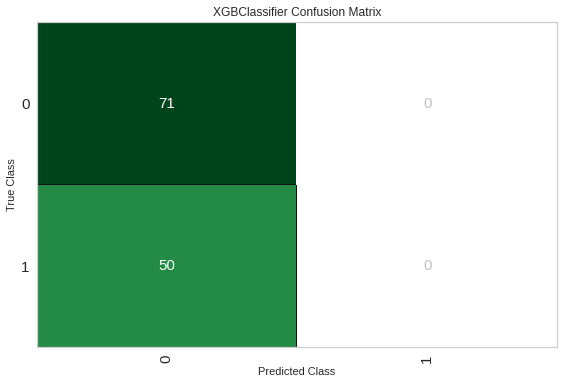

In [ ]:
plot_model(estimator = tuned_xgb, plot = 'confusion_matrix')

In [ ]:
print("Creating Fit the model")
print("="*50)
start = time.time()
calibrated_xgb = calibrate_model(xgb)
end = time.time()
print("="*50)
print("Model Fitting Finished")
print(f"Execution time is {end - start} secs")
print("="*50)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.5000,0.5,1.0,0.5000,0.6667,0.0,0.0
1,0.5000,0.5,1.0,0.5000,0.6667,0.0,0.0
2,0.5000,0.5,1.0,0.5000,0.6667,0.0,0.0
3,0.5000,0.5,1.0,0.5000,0.6667,0.0,0.0
4,0.5000,0.5,1.0,0.5000,0.6667,0.0,0.0
5,0.5000,0.5,1.0,0.5000,0.6667,0.0,0.0
6,0.5000,0.5,1.0,0.5000,0.6667,0.0,0.0
7,0.5000,0.5,1.0,0.5000,0.6667,0.0,0.0
8,0.5357,0.5,1.0,0.5357,0.6977,0.0,0.0
9,0.5185,0.5,1.0,0.5185,0.6829,0.0,0.0


Model Fitting Finished
Execution time is 35.15961766242981 secs


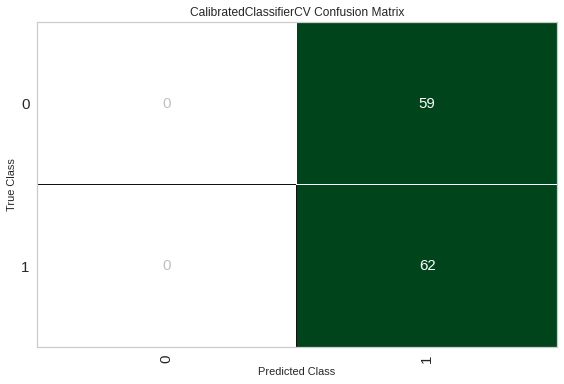

In [ ]:
plot_model(estimator = calibrated_xgb, plot = 'confusion_matrix')

In [ ]:
print("Creating Fit the model")
print("="*50)
start = time.time()
bagged_xgb = ensemble_model(xgb)
end = time.time()
print("="*50)
print("Model Fitting Finished")
print(f"Execution time is {end - start} secs")
print("="*50)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.5000,0.5,1.0,0.5000,0.6667,0.0,0.0
1,0.5000,0.5,1.0,0.5000,0.6667,0.0,0.0
2,0.5000,0.5,1.0,0.5000,0.6667,0.0,0.0
3,0.5000,0.5,1.0,0.5000,0.6667,0.0,0.0
4,0.5000,0.5,1.0,0.5000,0.6667,0.0,0.0
5,0.5000,0.5,1.0,0.5000,0.6667,0.0,0.0
6,0.5000,0.5,1.0,0.5000,0.6667,0.0,0.0
7,0.5000,0.5,1.0,0.5000,0.6667,0.0,0.0
8,0.5357,0.5,1.0,0.5357,0.6977,0.0,0.0
9,0.5185,0.5,1.0,0.5185,0.6829,0.0,0.0


Model Fitting Finished
Execution time is 45.71698522567749 secs


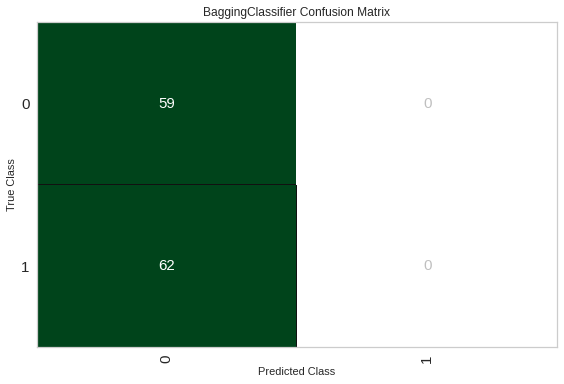

In [ ]:
plot_model(estimator = bagged_xgb, plot = 'confusion_matrix')

# Logistic regression model

In [ ]:
print("Creating Fit the model")
print("="*50)
start = time.time()
# Create a logistic regression model since it seems to be the best
lr = create_model('lr')
end = time.time()
print("="*50)
print("Model Fitting Finished")
print(f"Execution time is {end - start} secs")
print("="*50)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.5357,0.5,1.0,0.5357,0.6977,0.0,0.0
1,0.5000,0.5,1.0,0.5000,0.6667,0.0,0.0
2,0.5000,0.5,1.0,0.5000,0.6667,0.0,0.0
3,0.5000,0.5,1.0,0.5000,0.6667,0.0,0.0
4,0.5000,0.5,1.0,0.5000,0.6667,0.0,0.0
5,0.5000,0.5,1.0,0.5000,0.6667,0.0,0.0
6,0.5000,0.5,1.0,0.5000,0.6667,0.0,0.0
7,0.5000,0.5,1.0,0.5000,0.6667,0.0,0.0
8,0.5000,0.5,1.0,0.5000,0.6667,0.0,0.0
9,0.5185,0.5,1.0,0.5185,0.6829,0.0,0.0


Model Fitting Finished
Execution time is 1.6504087448120117 secs


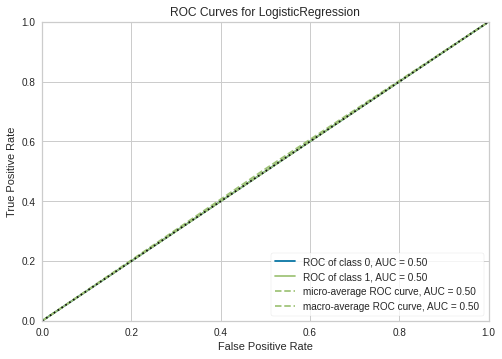

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

Model Fitting Finished
Execution time is 8.0707426071167 secs
Test Accuracy score 0.47


In [ ]:
print("Creating Fit the model")
print("="*50)
start = time.time()
# tune hyperparameters to optimize AUC
# tuned_lr = tune_model(lr, optimize = 'AUC') #default is 'Accuracy'
tuned_lr = tune_model(lr) #default is 'Accuracy'
end = time.time()


# Plot a AUC curve of the model 
plot_model(tuned_lr)

# Evaluate the model
evaluate_model(tuned_lr)

# Make some predictions and get the accuracy
lr_pred_new = predict_model(tuned_lr, data = tfidf_df_test)

y_pred = list(lr_pred_new['Label'].values)
y_test = list(tfidf_df_test['labels'].values)
testing_accuracy = accuracy_score(y_test, y_pred)
print("="*50)
print("Model Fitting Finished")
print(f"Execution time is {end - start} secs")
print("="*50)
print("Test Accuracy score {0}".format(testing_accuracy))
    

# Metrics

In [ ]:
from sklearn import metrics

# paramters are y_true, y_pred
C = metrics.confusion_matrix(y_test, y_pred)

# lists for the confusion matrix
true_positive = []
true_negative = []
false_postiive = []
false_negatives = []

true_positive.append(C[0,0])
true_negative.append(C[1,1])            
false_postiive.append(C[1,0])
false_negatives.append(C[0,1])

print(C)

print(("="*50))

print("True positives:", round(np.sum(true_positive)/len(y_test), 5), "%")
print("True negatives:", round(np.sum(true_negative)/len(y_test), 5), "%")
print("False positives:", round(np.sum(false_postiive)/len(y_test), 5), "%")
print("False negatives:", round(np.sum(false_negatives)/len(y_test), 5), "%")

NameError: ignored

In [ ]:
true_positive = C[0,0]
true_negative = C[1,1]            
false_postiive = C[1,0]
false_negatives = C[0,1]

precision = true_positive/(true_positive+false_postiive)
recall = true_positive/(true_positive/false_negatives)

In [ ]:
f1_score = (precision*recall)/(precision+recall)

print(f1_score)

nan


In [ ]:
fpr, tpr, thresh = metrics.roc_curve(y_test, y_pred)

auc = metrics.auc(fpr, tpr)

print("AUC:", auc)

AUC: 0.5


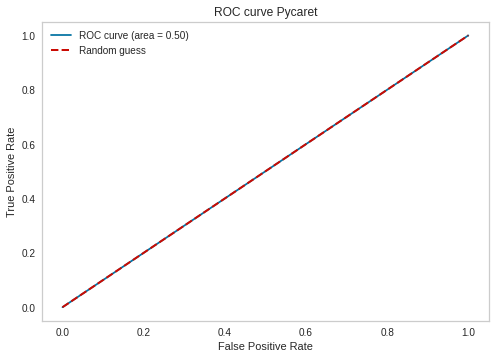

In [ ]:
import matplotlib.pyplot as plt

plt.plot(fpr, tpr, label='ROC curve (area = %.2f)' %auc)
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Random guess')
plt.title('ROC curve Pycaret')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid()
plt.legend()
plt.show()

# Output Model

https://pycaret.org/finalize-model/

In [ ]:
# create the best model model
lr = create_model('lr')
# finalize a model
final_rf = finalize_model(lr)

# Other attempts at models

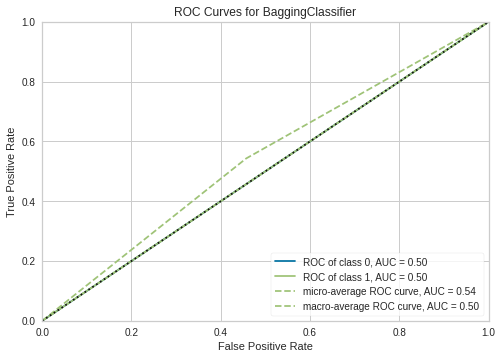

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

Model Fitting Finished
Execution time is 4.056607961654663 secs
Test Accuracy score 0.488


In [ ]:
print("Creating Fit the model")
print("="*50)
start = time.time()
# ensemble decision tree model with 'Bagging'
bagged_lr = ensemble_model(lr)
end = time.time()

# Plot a AUC curve of the model 
plot_model(bagged_lr)

# Evaluate the model
evaluate_model(bagged_lr)

# Make some predictions and get the accuracy
lr_pred_new = predict_model(bagged_lr, data = tfidf_df_test)

y_pred = list(lr_pred_new['Label'].values)
y_test = list(tfidf_df_test['labels'].values)
testing_accuracy = accuracy_score(y_test, y_pred)
print("="*50)
print("Model Fitting Finished")
print(f"Execution time is {end - start} secs")
print("="*50)
print("Test Accuracy score {0}".format(testing_accuracy))

In [ ]:
from sklearn import metrics

# paramters are y_true, y_pred
C = metrics.confusion_matrix(y_test, y_pred)

# lists for the confusion matrix
true_positive = []
true_negative = []
false_postiive = []
false_negatives = []

true_positive.append(C[0,0])
true_negative.append(C[1,1])            
false_postiive.append(C[1,0])
false_negatives.append(C[0,1])

print(C)

print(("="*50))

print("True positives:", round(np.sum(true_positive)/len(y_test), 5), "%")
print("True negatives:", round(np.sum(true_negative)/len(y_test), 5), "%")
print("False positives:", round(np.sum(false_postiive)/len(y_test), 5), "%")
print("False negatives:", round(np.sum(false_negatives)/len(y_test), 5), "%")

[[  0 244]
 [  0 256]]
True positives: 0.0 %
True negatives: 0.512 %
False positives: 0.0 %
False negatives: 0.488 %


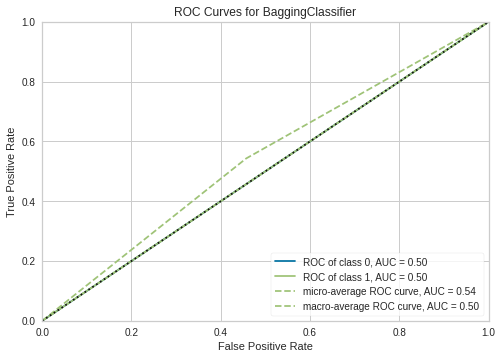

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

Test Accuracy score 0.488
Model Fitting Finished
Execution time is 4.054072856903076 secs


In [ ]:
print("Creating Fit the model")
print("="*50)
start = time.time()
# ensemble decision tree model with 'Bagging'
bagged_lr = ensemble_model(lr)
end = time.time()

# Plot a AUC curve of the model 
plot_model(bagged_lr)

# Evaluate the model
evaluate_model(bagged_lr)

# Make some predictions and get the accuracy
lr_pred_new = predict_model(bagged_lr, data = tfidf_df_test)

y_pred = list(lr_pred_new['Label'].values)
y_test = list(tfidf_df_test['labels'].values)
testing_accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy score {0}".format(testing_accuracy))
print("="*50)
print("Model Fitting Finished")
print(f"Execution time is {end - start} secs")
print("="*50)


In [ ]:
from sklearn import metrics

# paramters are y_true, y_pred
C = metrics.confusion_matrix(y_test, y_pred)

# lists for the confusion matrix
true_positive = []
true_negative = []
false_postiive = []
false_negatives = []

true_positive.append(C[0,0])
true_negative.append(C[1,1])            
false_postiive.append(C[1,0])
false_negatives.append(C[0,1])

print(C)

print(("="*50))

print("True positives:", round(np.sum(true_positive)/len(y_test), 5), "%")
print("True negatives:", round(np.sum(true_negative)/len(y_test), 5), "%")
print("False positives:", round(np.sum(false_postiive)/len(y_test), 5), "%")
print("False negatives:", round(np.sum(false_negatives)/len(y_test), 5), "%")

[[  0 244]
 [  0 256]]
True positives: 0.0 %
True negatives: 0.512 %
False positives: 0.0 %
False negatives: 0.488 %


In [ ]:
# Make some predictions and get the accuracy
lr_pred_new = predict_model(tuned_lr, data = tfidf_df_test)

y_pred = list(lr_pred_new['Label'].values)
y_test = list(tfidf_df_test['labels'].values)
testing_accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy score {0}".format(testing_accuracy))
    

Test Accuracy score 0.488


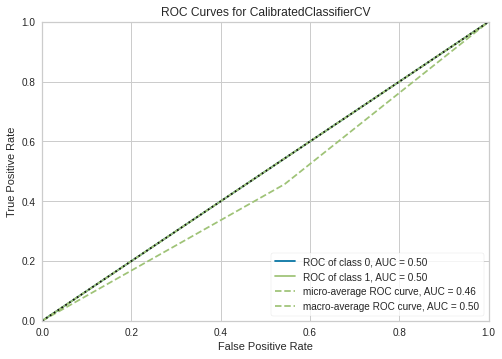

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

Model Fitting Finished
Execution time is 3.5966696739196777 secs
Test Accuracy score 0.512


In [ ]:
print("Creating Fit the model")
print("="*50)
start = time.time()
#calibrate trainde boosted dt
calibrated_lr = calibrate_model(lr)
end = time.time()


# Plot a AUC curve of the model 
plot_model(calibrated_lr)

# Evaluate the model
evaluate_model(calibrated_lr)

# Make some predictions and get the accuracy
lr_pred_new = predict_model(calibrated_lr, data = tfidf_df_test)

y_pred = list(lr_pred_new['Label'].values)
y_test = list(tfidf_df_test['labels'].values)
testing_accuracy = accuracy_score(y_test, y_pred)
print("="*50)
print("Model Fitting Finished")
print(f"Execution time is {end - start} secs")
print("="*50)
print("Test Accuracy score {0}".format(testing_accuracy))

In [ ]:
best = automl()
print(best)

LogisticRegression(C=7.472, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=1000, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=482, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


In [ ]:
all_models = models()
print(all_models)

                                     Name  ...  Turbo
ID                                         ...       
lr                    Logistic Regression  ...   True
knn                K Neighbors Classifier  ...   True
nb                            Naive Bayes  ...   True
dt               Decision Tree Classifier  ...   True
svm                   SVM - Linear Kernel  ...   True
rbfsvm                SVM - Radial Kernel  ...  False
gpc           Gaussian Process Classifier  ...  False
mlp                        MLP Classifier  ...  False
ridge                    Ridge Classifier  ...   True
rf               Random Forest Classifier  ...   True
qda       Quadratic Discriminant Analysis  ...   True
ada                  Ada Boost Classifier  ...   True
gbc          Gradient Boosting Classifier  ...   True
lda          Linear Discriminant Analysis  ...   True
et                 Extra Trees Classifier  ...   True
lightgbm  Light Gradient Boosting Machine  ...   True

[16 rows x 3 columns]


In [ ]:
print("Keep VM")

Keep VM


# ==============================================================

# Ignore this section

In [ ]:
from pycaret.datasets import get_data
data = get_data('juice') 

from pycaret.classification import *
# REMEMBER THAT YOU HAVE TO ENTER AN INPUT INTO THIS
exp_clf = setup(data, target="Purchase")

,Description,Value
0,session_id,7621
1,Target,Purchase
2,Target Type,Binary
3,Label Encoded,"CH: 0, MM: 1"
4,Original Data,"(1070, 19)"
5,Missing Values,False
6,Numeric Features,13
7,Categorical Features,5
8,Ordinal Features,False
9,High Cardinality Features,False


In [ ]:
# Importing data using pandas
import pandas as pd

feature_vector, labels = prepare_data(500)

# Convert feature_vectors into a pandas dataframe of 
# term frequency inverse document frequency of each word
# tfidf_tf = pd.DataFrame(feature_vector)
tfidf_tf = pd.DataFrame(feature_vector)

# Add the labels
tfidf_tf['labels'] = labels

print(tfidf_tf.head())

#==========================================


Dataset loaded
Creating Feature Vector
Feature Vector Created
1000
Execution time is 3.1326351165771484 secs
          0         1         2         3  ...  18194  18195  18196    labels
0  0.001904 -0.000198  0.004785 -0.004915  ...    0.0    0.0    0.0  positive
1 -0.045806 -0.135172 -0.060521 -0.034925  ...    0.0    0.0    0.0  positive
2 -0.166101 -0.011698 -0.061432 -0.020591  ...    0.0    0.0    0.0  positive
3 -0.002587 -0.014403 -0.453894  0.062500  ...    0.0    0.0    0.0  positive
4  0.002689 -0.094871  0.007066  0.009446  ...    0.0    0.0    0.0  negative

[5 rows x 18198 columns]


---

---

---

---

# Old Code

---

---

---

---

In [ ]:
# Create the set of stopwords for cleaning text
stopwords = set(w.rstrip() for w in open('/content/drive/MyDrive/CIT/FYP/ImplementationFiles/stopwords.txt'))

In [ ]:
# This funciton handles celaning text
def clean_text(text):
    # Create the lemmatizer
    wordnet_lemmatizer = WordNetLemmatizer()
    
    # Get rid of non alpha characters except "'" as it is needed for the lemment
    text = "".join(c for c in text if c.isalnum() or c == " " or "'")
    
    # Get rid of capitals
    text = text.lower()
    
    # Tokenize the words    
    # Create tokens of each word
    token_text = word_tokenize(text)
    
    # Get rid of any piece of text that isn't over 2 characters
    token_text = [t for t in token_text if len(t) > 2] 
    
    # Put words in base form by doing lemmatization
    token_text = [wordnet_lemmatizer.lemmatize(t) for t in token_text]

    # Remove stopwords
    token_text = [t for t in token_text if t not in stopwords]
    
    # Return the tokens
    return token_text

In [ ]:
# This function will get the term frequencies for word in the review
# TF = Term I frequency in document/total words in document
def calc_tf(term_count, review_corpus):
    # A dictionary of all the term frequencies found
    tf_freq = dict.fromkeys(term_count.keys(), 0)   
    
    # Review corpus is a tokenized list so the total words iteh length
    total_words = len(review_corpus)
    
    # Calculate the term frequency for each word
    for word, count in term_count.items():
        tf_freq[word] = count/total_words
        
    return tf_freq

In [ ]:
# This calcualtes the idf
# IDF = log(2)*(Total number of Documents/documents frequency or documents with term)
def calc_idf(unique_terms, list_doc_terms):   
    # A dicitonary of all the inverse document frequencies
    idf = dict.fromkeys(unique_terms, 0)
    
    # Basically list_doc_terms has all the documents with the term count for each word
    # You go through each document count the terms where they occured
    for doc_terms in list_doc_terms:  
        # This for loop is counting the amount of document a word was in
        for word, value in doc_terms.items():
            if 0 < value:
                idf[word] += 1
        
    # Now we calculate idf
    for word, value in idf.items():
        idf[word] = math.log10(10 / float(value))
    
    return idf

In [ ]:
# Modified this function to return a list as dictionaries arn't needed anymore
def calc_tf_idf(tf, idf, n_terms):
    # Create an array that is of length of the number of unique terms
    tf_idf_array = np.zeros(n_terms)
    
    for index, (word, value) in enumerate(tf.items()):
        # Add the tfidf to the array
        tf_idf_array[index] = value*idf[word]
    
    return tf_idf_array

In [ ]:
def process_text(text_data):
    # A list of all the cleaned reviews
    doc_list = []
    
    # List of all the unique terms
    unique_terms = []
    
    # A list of all the term frequencies
    tf_list = []
    
    for review in text_data:
        # First clean the review
        clean_review = clean_text(review)
        
        # Keeps track of the term counts for each word
        count_dict = {}
        
        # Now lets find the total count for each word
        for token in clean_review:
            if token not in count_dict:
                count_dict[token] = 1
            else:
                count_dict[token] += 1
        
        # Caclulate the term frequencies for each document
        tf_list.append(calc_tf(count_dict, clean_review))
        
        # Then add the dictionary of counts for each document to the list
        doc_list.append(count_dict)
        
        # Then add the new unique terms
        unique_terms = set(unique_terms).union(set(clean_review))
    
    # Calculate the inverse document frequency value
    idf = calc_idf(unique_terms, doc_list)
    
    # This array will contain the tfidf values for each term in each review
    tfidf_values = np.zeros((len(tf_list), len(unique_terms)))
    
    # Now we can get the TFIDF for each document
    for index, term_freq in enumerate(tf_list):
        # This will return an array of the tfidf values calculated.
        # The length of the unique terms list is passed in so that the 
        # Array that is returned matches the tfidf array
        tf_idf_array = calc_tf_idf(term_freq, idf, len(unique_terms))
        # Add this to the overall tfidf values calculated
        tfidf_values[index,:] = tf_idf_array
    
    return tfidf_values

In [ ]:
# Prepare the data
def prepare_data(num):
    print("="*50)

    # Load the dataset
    # imdb_df = pd.read_csv("IMDB Dataset.csv")
    imdb_df = pd.read_csv("/content/drive/MyDrive/CIT/FYP/ImplementationFiles/IMDB_Dataset.csv")
    print("Dataset loaded")
    print("="*50)

     # Change each positive and negative value to 1 and 0 respectively    
    imdb_df['sentiment'] = imdb_df['sentiment'].map({'negative' : 0, 'positive' : 1})
    
    # For testing, a much smaller dataset is going to be used
    # imdb_df = imdb_df.head(25000)

    # Group all the negative reviews and get the first 2500
    imdb_df_neg = (imdb_df[imdb_df['sentiment'] == 0])[0:num]
    # imdb_df_neg = (imdb_df[imdb_df['sentiment'] == "negative"])[0:num]
    
    # Group all the positive and get the first 2500
    imdb_df_pos = imdb_df[imdb_df['sentiment'] == 1][0:num]
    # imdb_df_pos = imdb_df[imdb_df['sentiment'] == "positive"][0:num]
    
    # Combine the two split positives and negatives into one dataframe
    imdb_df = pd.concat([imdb_df_neg, imdb_df_pos]) 
    # print(test_df)
    
    # .values on a column of a dataframe returns a numpy array
    # This is a numpy array of all the reviews
    # initial_reviews = imdb_df['review'].values
    initial_reviews = imdb_df['review'].values
    
    # This is a numpy array of all the positive and negativelabels
    # labels = imdb_df['sentiment'].values
    labels = imdb_df['sentiment'].values
    
    print("Creating Feature Vector")
    print("="*50)
    start = time.time()
    # Process the text data and create teh feature vector
    feature_vector = process_text(initial_reviews)
    end = time.time()
    print("Feature Vector Created")
    print(len(feature_vector))
    print(f"Execution time is {end - start} secs")
    print("="*50)
    
    # Shuffle the labesl and feature vector using sklearn shuffle
    feature_vector, labels = shuffle(feature_vector, labels)
    
    # Creating train and test data
    # The splits will be 80:20 
    no_samples = 0.8


    # This gets the percentage of indexes from feature vector and uses those for training
    X_train = feature_vector[0:int(no_samples*len(feature_vector))]
    y_train = labels[0:int(no_samples*len(labels))]
    
    # Go from the index that was used for training to the final
    X_test = feature_vector[int(no_samples*len(feature_vector)):len(feature_vector)]
    y_test = labels[int(no_samples*len(labels)):len(labels)]
    
    return X_train, y_train, X_test, y_test

In [ ]:
# Importing data using pandas
import pandas as pd

X_train, y_train, X_test, y_test = prepare_data(500)

print(len(X_train))
print(len(y_train))
print(len(X_test))
print(len(y_test))

# Convert feature_vectors into a pandas dataframe of 
# term frequency inverse document frequency of each word
# tfidf_tf = pd.DataFrame(feature_vector)
tfidf_df_train = pd.DataFrame(columns = ['features', 'labels'])
tfidf_df_test = pd.DataFrame(columns = ['features', 'labels'])

# Add the labels
# tfidf_tf['labels'] = labels

for i in range(len(X_train)):
  tfidf_df_train.loc[i] = [X_train[i].tolist()] + [y_train[i]]

for i in range(len(X_test)):
  tfidf_df_test.loc[i] = [X_test[i].tolist()] + [y_test[i]]


print(tfidf_df_train.head())
print(tfidf_df_test.head())
#==========================================
